<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Отсечение-выбросов" data-toc-modified-id="Отсечение-выбросов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Отсечение выбросов</a></span></li><li><span><a href="#Изучение-факторов,-влияющих-на-цену-квартир" data-toc-modified-id="Изучение-факторов,-влияющих-на-цену-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение факторов, влияющих на цену квартир</a></span></li><li><span><a href="#Анализируем-населенные-пункты-с-максимальным-числом-объявлений" data-toc-modified-id="Анализируем-населенные-пункты-с-максимальным-числом-объявлений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализируем населенные пункты с максимальным числом объявлений</a></span></li><li><span><a href="#Анализируем-данные-по-центру-города" data-toc-modified-id="Анализируем-данные-по-центру-города-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализируем данные по центру города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [4]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [5]:
df.duplicated().sum()

0

### Вывод

В представленном наборе данных ряд столбцов имеет некорректный тип и его надо преобразовать. В частности 'first_day_exposition' должен быть преобразован в формат datetime, а 'is_apartment' в bool. Отдельные столбцы содержат большое количество пропусков. Необходим провести их заполнение корректными значениями. Явных дубликов в датафрейме нет.


## Предобработка данных

### Заполнение пропусков

<AxesSubplot:>

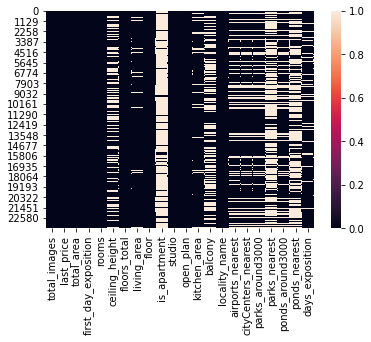

In [6]:
#построим тепловую карту пропусков
cols = df.columns
sns.heatmap(df[cols].isna())

In [7]:
df['is_apartment']=df['is_apartment'].fillna(False)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Пропуски в столбце 'is_apartment' веоятно обусловлены отсутствием категории апартаментов у жилья. Поэтому пропуски заменены на значение False и тип данных во всем стобце становится bool. Пропуски в 'balcony' заполняем нулевым значением, так как отсутствие информации о балконе скорее всего свидетельсвет о его отсутствии.

In [9]:
df.query('rooms == 0')['living_area'].median()

18.0

In [10]:
df.loc[(df.rooms == 0), 'rooms'] = 1

В датасете есть данные о квартирах с нулем комнат, при этом у них есть жилая площадь с медианным значением соответствующим одной комнате (18 кв.м). Поэтому заменим ноль комнат на одну комнату.

In [11]:
df['balcony'] = df['balcony'].fillna(0)
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
print(df['total_area'].describe())
print(df['living_area'].describe())
avg_living_area = df['living_area'].median()/df['total_area'].median()
print(avg_living_area)
df['living_area'] = df['living_area'].fillna(avg_living_area*df['total_area'])
df.isna().sum()


count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64
count   21796.00
mean       34.46
std        22.03
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64
0.5769230769230769


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце с жилой площадью ('living_area') заполняем произведением среднего соотношения жилой и общей площади по выборке, умноженным на общую площадь( пропусков в 'total_area' нет)

In [13]:
df.query('total_area < 20')['kitchen_area'].head(30)

716      NaN
4542     NaN
5855     NaN
6084    3.00
8454     NaN
8729    2.40
8755     NaN
8886     NaN
9157     NaN
9412     NaN
9817     NaN
10208   3.00
12040    NaN
12881    NaN
12996    NaN
16949    NaN
17961    NaN
19311    NaN
19546    NaN
19558    NaN
19642   2.00
19807    NaN
19904    NaN
20714    NaN
21802    NaN
22356    NaN
23191    NaN
Name: kitchen_area, dtype: float64

In [14]:
df[df['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,41.31,22,False,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
44,13,5350000.00,40.00,2018-11-18T00:00:00,1,NaN,22.00,23.08,3,False,...,NaN,1.00,Санкт-Петербург,30471.00,11603.00,1.00,620.00,1.00,1152.00,NaN
45,17,5200000.00,50.60,2018-12-02T00:00:00,2,2.65,9.00,30.30,7,False,...,7.00,0.00,Санкт-Петербург,30011.00,12872.00,0.00,NaN,0.00,NaN,NaN
46,17,6600000.00,52.10,2019-01-31T00:00:00,2,2.60,24.00,29.70,9,False,...,8.30,2.00,Санкт-Петербург,15114.00,12702.00,0.00,NaN,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.00,145.00,2018-11-02T00:00:00,4,3.00,26.00,71.40,17,False,...,15.60,0.00,Санкт-Петербург,11827.00,11459.00,0.00,NaN,0.00,NaN,NaN
23685,15,2490000.00,31.00,2019-01-24T00:00:00,1,2.50,5.00,17.30,5,False,...,5.60,1.00,Ломоносов,48393.00,51818.00,0.00,NaN,0.00,NaN,NaN
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,False,...,13.83,0.00,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,False,...,NaN,0.00,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Пропуски в столбце 'kitchen_area' заполнять средними значениями рискованно, так как вероятно они означают тот факт, что в квартире не выделена отдельная кухня. Это подтверждается высоким количеством пропусков в квартирах малой площади. Поэтому заменим пропуски на нули в однокомнатных квартирах. В остальных квартирах пропуски заменим медианным значением. А вот большой объем пропусков по высоте потолков можно заполнить медианным значением (использование среднего нежелательно из-за вероятно ошибочных выбросов в выборке в 1 и 100 метров). Также заполним медианным значением пропуски в 'days_exposition', так как первый день экспозиции в строках с пропусками по данному параметру сильно разнится и отсутствие данных в них не может быть обусловлено "свежестью" объявлений. Объем пропусков в 'floors_total' сравнительно небольшой и его можно заменить медианным значением по Санкт-Петербургу, где сосредоточено большинство объектов с пропусками.

In [16]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
df['floors_total'] = df['floors_total'].fillna(df[df['locality_name'] == 'Санкт-Петербург']['floors_total'].median())

In [17]:
#Смотрим медианы площади кухонь по количеству комнат
print(df[df['rooms'] == 2]['kitchen_area'].median())
print(df[df['rooms'] == 3]['kitchen_area'].median())
print(df[df['rooms'] == 4]['kitchen_area'].median())

8.8
9.5
11.1


Как видно выше, число комнат влияет на размер кухни, поэтому корректно провести заполнение пропусков в данном столбце с учетом медиан по квартирам, сгруппированным по числу комнат. Для этого применим метод transform. Аналогичным образом проведем заполнение пропусков по высоте зданий (в привязке с медианному значению высот по населенным пунктам).

In [18]:
df.loc[df['rooms'] == 1,'kitchen_area'] = df.loc[df['rooms'] == 1,'kitchen_area'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'))
df['floors_total'] = df['floors_total'].fillna(df.groupby('locality_name')['floors_total'].transform('median'))


In [19]:
df[df['locality_name'] == 'Санкт-Петербург']['floors_total'].median()

9.0

In [20]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [21]:
df['locality_name'] = df['locality_name'].fillna('не известна')

In [22]:
len(df[df['parks_around3000'].isna()].query('locality_name == "Санкт-Петербург"'))

61

В представленном датафрейме отсутствует значительный объем данных в графах 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'. Вероятно, это связано со сбоем в автоматизированной обработке картографических данных. В большинстве случаев это связано с объявлениями о продаже недвижимости за пределами Санкт-Петербурга. Но есть 61 объявление с пропусками во всех этих столбцах и в Санкт-Петербурге. Корректно заполнить данные пропуски нечем. 

### Изменение типов данных

Переведем столбцы 'first_day_exposition' в datetime.

In [23]:
df['first_day_exposition'] = pd.to_datetime(df.first_day_exposition,format='%Y-%m-%dT%H:%M:%S')
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce').astype(int)

In [24]:
df['floors_total'].unique()


array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [25]:
#проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [26]:
print(len(df['locality_name'].unique()))
df['locality_name'] = df['locality_name'].str.lower()
len(df['locality_name'].unique())

365


365

In [27]:
#Выявляем разное написание слово "поселок", что может привести к дублировнию наименований
loc = df['locality_name'].unique().tolist()
sorted(loc)


['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок янино-1',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',

In [28]:
#Переименование приводит к значительному сокращению скрытых дубликов.
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
len(df['locality_name'].unique())


331

Предаставленный датасет обладал рядом определенных недостатков, в частности, как видно на хитмепе в начале раздела , он содержал большой объем пропусков в столбцах по удаленности жилья от парков и водоемов. Эти данные нечем было заполнить, но данный факт не являлся критичным, так как эти данные не были ключевыми для данного исследования. Чувствительными были пропуски в столбце с высотой потолков. Их удалось заполнить медианами по населенным пунктам. Также выявлено и отсечено дублирование названий по населенным пунктам. 

## Расчёты и добавление результатов в таблицу

In [29]:
#Добавляем столбец со средней ценой квадратного метра.
df['sqm_price'] = df ['last_price'] / df ['total_area']

In [30]:
#Содаем столбцы со днем недели, месяцем и годом публикации объявления.
df['dayofweek'] = df['first_day_exposition'].dt.dayofweek 
df['month'] = df['first_day_exposition'].dt.month 
df['year'] = df['first_day_exposition'].dt.year 

In [31]:
def first_and_last(line): 
    if line['floor'] == 1:
        return 'первый'
    if line['floor'] == line['floors_total']:
        return 'последний'
    return 'другой'
  

In [32]:
#Категоризируем строки на первый, последние и другие этажи.
df['what_floor'] = df.apply(first_and_last,axis=1)

In [33]:
#Проверка
df.query('what_floor == "последний"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,dayofweek,month,year,what_floor
12,10,3890000.00,54.00,2016-06-30,2,2.65,5,30.00,5,False,...,NaN,NaN,NaN,NaN,90.00,72037.04,3,6,2016,последний
13,20,3550000.00,42.80,2017-07-01,2,2.56,5,27.00,5,False,...,1.00,294.00,3.00,298.00,366.00,82943.93,5,7,2017,последний
23,11,2950000.00,32.00,2016-10-29,1,2.60,9,17.70,9,False,...,2.00,517.00,1.00,190.00,615.00,92187.50,5,10,2016,последний
36,13,3790000.00,45.00,2017-01-25,2,2.65,9,27.00,9,False,...,1.00,459.00,0.00,NaN,139.00,84222.22,2,1,2017,последний
43,13,9330000.00,48.00,2017-01-10,2,3.00,4,28.00,4,False,...,0.00,NaN,1.00,492.00,763.00,194375.00,1,1,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23641,3,3100000.00,30.00,2018-03-28,1,2.50,5,17.00,5,False,...,0.00,NaN,0.00,NaN,10.00,103333.33,2,3,2018,последний
23644,7,4990000.00,62.50,2018-04-26,2,2.70,4,32.30,4,False,...,1.00,560.00,1.00,171.00,166.00,79840.00,3,4,2018,последний
23648,14,10100000.00,78.00,2017-05-12,3,3.27,5,48.60,5,False,...,1.00,621.00,2.00,117.00,621.00,129487.18,4,5,2017,последний
23660,1,2950000.00,53.60,2018-02-01,2,2.75,3,32.00,3,False,...,0.00,NaN,0.00,NaN,35.00,55037.31,3,2,2018,последний


In [34]:
#добавляем столбцы соотношений жилой и общей площади квартир и площади кухни и квартиры
df['living_to_total_ratio'] = df['living_area'] / df['total_area']
df['kitchen_to_total_ratio'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

### Отсечение выбросов

In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df['total_area'].describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

In [37]:
df_before_cut = df.describe()[['total_area','last_price','rooms','ceiling_height','days_exposition']] 
df_before_cut


,total_area,last_price,rooms,ceiling_height,days_exposition
count,23699.00,23699.00,23699.00,23699.00,23699.00
mean,60.35,6541548.77,2.08,2.72,169.36
std,35.65,10887013.27,1.07,0.99,206.54
min,12.00,12190.00,1.00,1.00,1.00
25%,40.00,3400000.00,1.00,2.60,45.00
50%,52.00,4650000.00,2.00,2.65,95.00
75%,69.90,6800000.00,3.00,2.70,199.00
max,900.00,763000000.00,19.00,100.00,1580.00


In [38]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sqm_price', 'dayofweek', 'month',
       'year', 'what_floor', 'living_to_total_ratio',
       'kitchen_to_total_ratio'],
      dtype='object')

<AxesSubplot:>

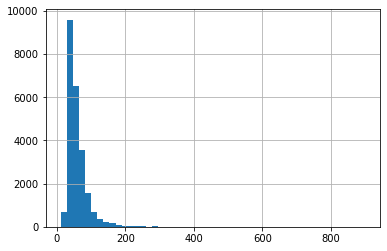

In [39]:
#Строим гистограмму по площади квартир
df['total_area'].hist(bins=50)

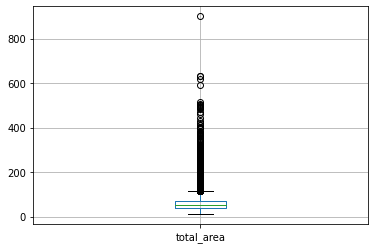

In [40]:
df.boxplot('total_area')
plt.show()

In [41]:
#создаем функцию для отрезания выбросов, которые мешают анализу данных
def drop_ej(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

In [42]:
#применяем функцию и оцениваем масштабы удалений строк
drop_ej(df,'total_area')

In [43]:
len(df['total_area'])

22459

<AxesSubplot:>

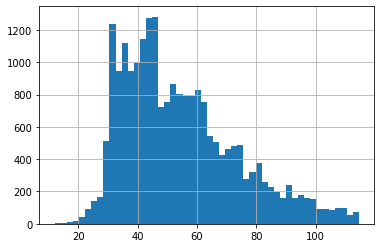

In [44]:
#Строим гисторграмму после очистки данных (она приобрела более приемлемый вид)
df['total_area'].hist(bins=50)

In [45]:
#анализируем столбец с ценами
df['last_price'].describe()

count      22459.00
mean     5307233.55
std      3395087.35
min        12190.00
25%      3359000.00
50%      4500000.00
75%      6300000.00
max     82000000.00
Name: last_price, dtype: float64

<AxesSubplot:>

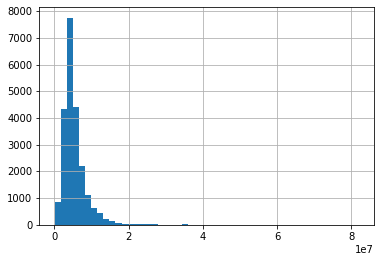

In [46]:
#По цене квартир
df['last_price'].hist(bins=50)

In [47]:
#очистка и подсчет оставшихся строк
drop_ej(df,'last_price')
len(df['last_price'])

21119

<AxesSubplot:>

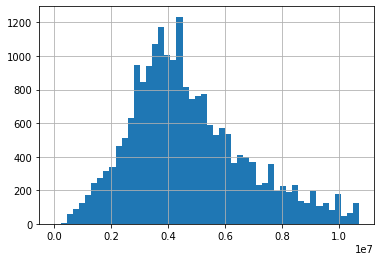

In [48]:
df['last_price'].hist(bins=50)

In [49]:
df['rooms'].describe()

count   21119.00
mean        1.91
std         0.87
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: float64

<AxesSubplot:>

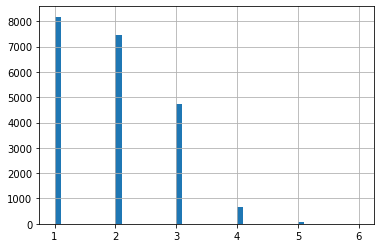

In [50]:
#По числу комнат
df['rooms'].hist(bins=50)

In [51]:
df['ceiling_height'].describe()

count   21119.00
mean        2.69
std         0.79
min         1.00
25%         2.60
50%         2.65
75%         2.65
max        32.00
Name: ceiling_height, dtype: float64

<AxesSubplot:>

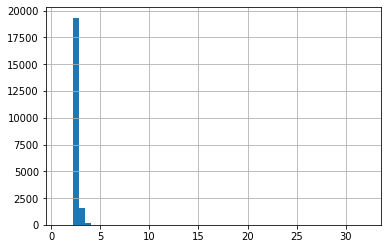

In [52]:
#По высоте потолков
df['ceiling_height'].hist(bins=50)

In [53]:
#уберем данные с явно шибочной внесенной высотой потолков

df = df.query('ceiling_height < 10')
df = df.query('ceiling_height > 1.5')

In [54]:
# по итогам очистки данных от экстремальных значений отброшено 2606 строк или 11% совокупности
print(23699-21093)
print((23699-21093)/23699)

2606
0.1099624456728132


<AxesSubplot:>

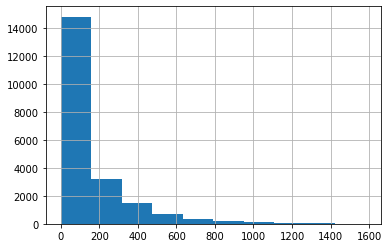

In [55]:
#строим гистограмму дней экспозиции, то есть вемени продажи
df['days_exposition'].hist()

In [56]:
df['days_exposition'].describe()

count   21093.00
mean      161.84
std       197.05
min         1.00
25%        45.00
50%        95.00
75%       191.00
max      1580.00
Name: days_exposition, dtype: float64

In [57]:
drop_ej(df,'days_exposition')

In [58]:
df['days_exposition'].describe()

count   19007.00
mean      108.19
std        92.23
min         1.00
25%        44.00
50%        94.00
75%       142.00
max       410.00
Name: days_exposition, dtype: float64

In [59]:
df_after_cut = df.describe()[['total_area','last_price','rooms','ceiling_height','days_exposition']]
df_after_cut

,total_area,last_price,rooms,ceiling_height,days_exposition
count,19007.00,19007.00,19007.00,19007.00,19007.00
mean,51.80,4679147.02,1.90,2.67,108.19
std,17.10,2023574.07,0.87,0.18,92.23
min,12.00,12190.00,1.00,1.75,1.00
25%,38.50,3300000.00,1.00,2.60,44.00
50%,48.00,4340000.00,2.00,2.65,94.00
75%,62.00,5800000.00,3.00,2.65,142.00
max,114.50,10700000.00,6.00,8.30,410.00


In [60]:
pd.merge(df_before_cut, df_after_cut, how='outer', on=None, left_on=None, right_on=None, left_index=True, right_index=True, suffixes=('_before', '_after')) 
#pd.concat([df_before_cut,df_after_cut],axis=1)

,total_area_before,last_price_before,rooms_before,ceiling_height_before,days_exposition_before,total_area_after,last_price_after,rooms_after,ceiling_height_after,days_exposition_after
count,23699.00,23699.00,23699.00,23699.00,23699.00,19007.00,19007.00,19007.00,19007.00,19007.00
mean,60.35,6541548.77,2.08,2.72,169.36,51.80,4679147.02,1.90,2.67,108.19
std,35.65,10887013.27,1.07,0.99,206.54,17.10,2023574.07,0.87,0.18,92.23
min,12.00,12190.00,1.00,1.00,1.00,12.00,12190.00,1.00,1.75,1.00
25%,40.00,3400000.00,1.00,2.60,45.00,38.50,3300000.00,1.00,2.60,44.00
50%,52.00,4650000.00,2.00,2.65,95.00,48.00,4340000.00,2.00,2.65,94.00
75%,69.90,6800000.00,3.00,2.70,199.00,62.00,5800000.00,3.00,2.65,142.00
max,900.00,763000000.00,19.00,100.00,1580.00,114.50,10700000.00,6.00,8.30,410.00


По итогам очистки таблицы среднее общей площади кватиры сократилось с 60.35 до 51.80 кв.м., а медиана с 52 до 48 кв.м. Стандартное отклонение сократилось более чем в два раза до 17.1. Средняя высота потолков снизилась на 5 см - до 2.67 м, а среднее число дней экспозиции со 169 до 108 дней. Сильно снизилась средняя цена квартир: с 6,5 до 4,7 млн руб.

После очистки данных сосвокупности от редких и выбивающихся значений по длительности продажи можно констатировать, что среднее время проджаи квартиры **108 дней**, медианное - **94 дня**. Нормальным можно считать срок экспозиции квартиры в диапаоне от **44 до 142 дней**. Очистка данных позволила сниить разницу между средним и медианным значением со 101 до 14 дней.


### Изучение факторов, влияющих на цену квартир

In [61]:
total_corr = df.corr()['sqm_price']
total_corr.sort_values(ascending=False)

sqm_price                 1.00
last_price                0.62
floors_total              0.35
floor                     0.25
kitchen_to_total_ratio    0.21
ceiling_height            0.18
kitchen_area              0.13
total_images              0.12
parks_around3000          0.09
year                      0.09
ponds_around3000          0.07
parks_nearest             0.05
studio                    0.05
balcony                   0.04
open_plan                 0.02
is_apartment              0.01
month                    -0.01
dayofweek                -0.01
ponds_nearest            -0.02
airports_nearest         -0.04
days_exposition          -0.04
total_area               -0.12
living_area              -0.19
living_to_total_ratio    -0.23
rooms                    -0.25
cityCenters_nearest      -0.39
Name: sqm_price, dtype: float64

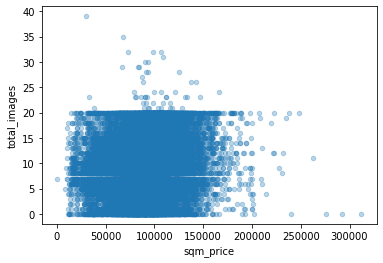

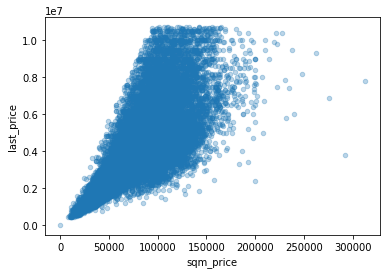

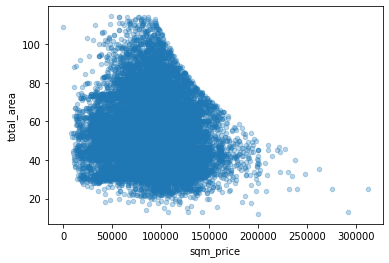

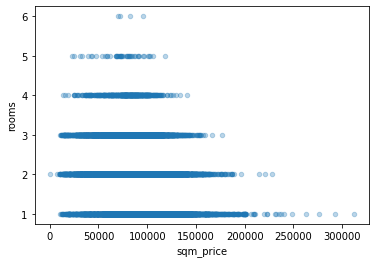

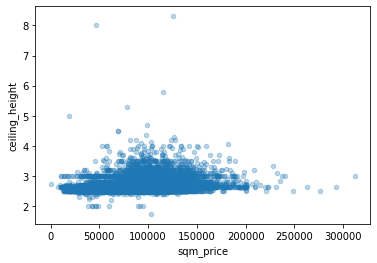

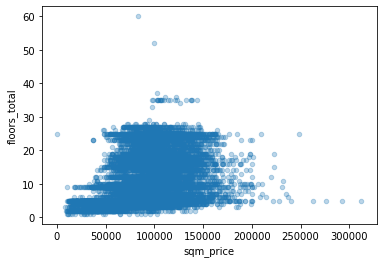

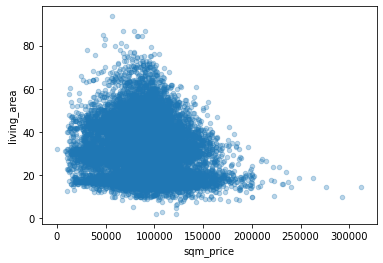

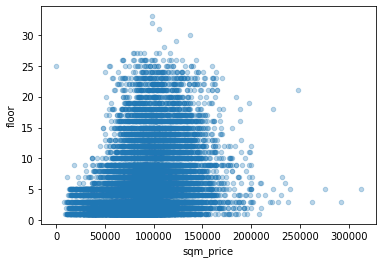

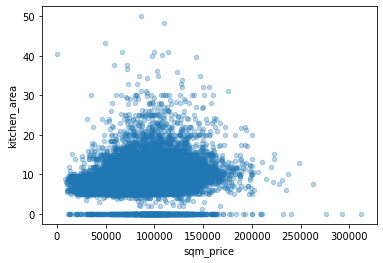

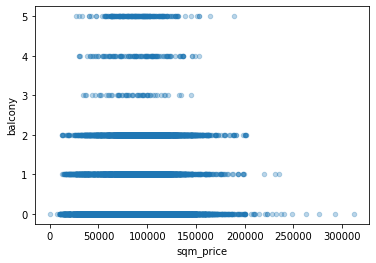

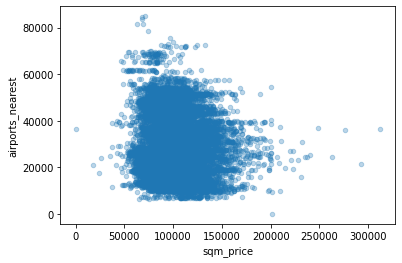

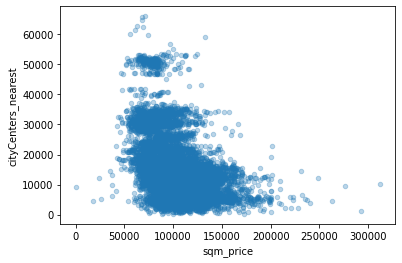

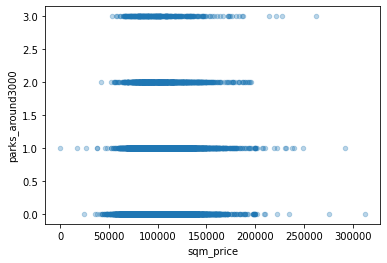

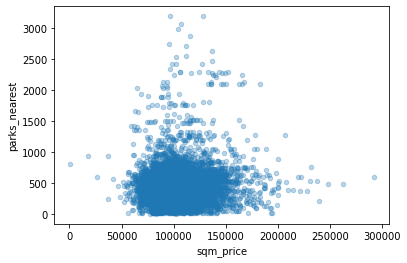

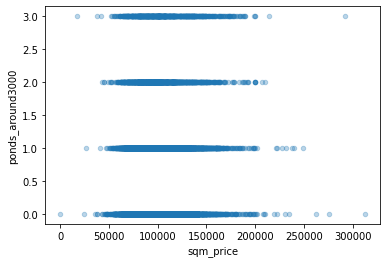

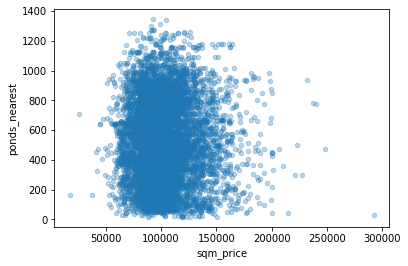

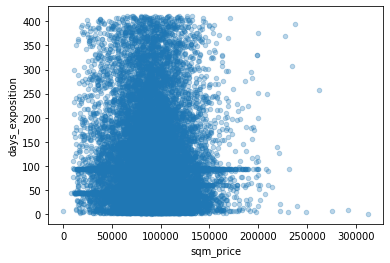

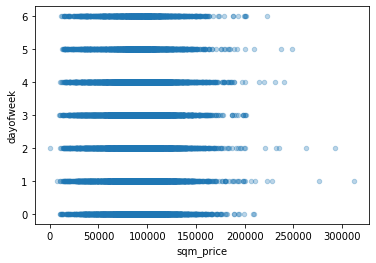

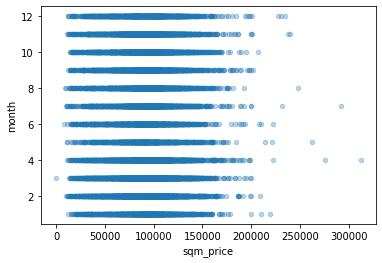

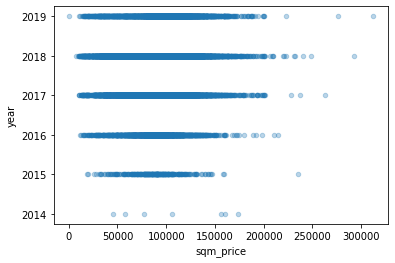

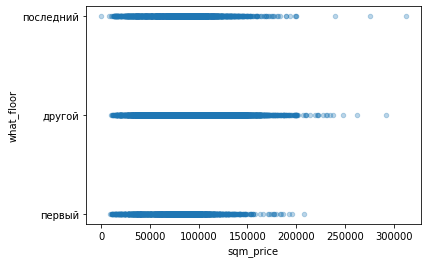

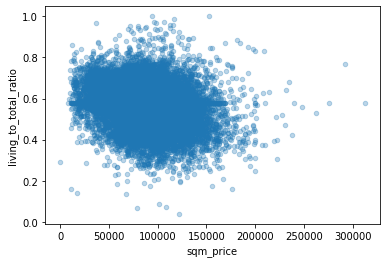

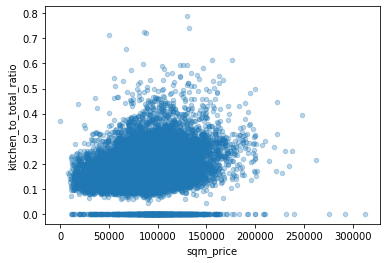

In [62]:
#Построим диаграммы рассеивания для основных показателей датасета
df.columns
columns_for_plot = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'dayofweek', 'month',
       'year', 'what_floor', 'living_to_total_ratio',
       'kitchen_to_total_ratio']
for i in columns_for_plot:
    df.plot(x='sqm_price', y=i, kind='scatter', alpha=0.3)

Выявлена корреляция между стоимостью квадратного метра и расстоянием от центра (**-0.39**), высотой здания (**0.35**), числом комнат (**-0.25**, то есть, чем меньше комнат, тем выше цена квадратного метра), а также соотношением размера кухни с общей площадью (**0.21**, то есть увеличение относительного размера кухни приводит к росту стоимости жилья). Данные зависимости также можно проследить на построенных выше диаграммах рассеивания. Зависимость цены от наличия водоема или парка поблизости невысока и составляет (0.07 и 0.09) соответственно. Также есть сильная связь между стоимостью квадратного метра и общей стоимостью квартиры. Кроме того, на диаграммах рассеивания заметна определенная зависимсоть между общей и жилой площадями квартиры и ценой (чем меньше квартира, тем выше стоимость квадратного метра).

In [63]:
#Изучим средние и медианные значения по данным, сгруппированным по "первому, последнему и другому" этажу
floor_table = pd.pivot_table(data=df,index='what_floor',aggfunc=['median','mean'])[[('median',       'sqm_price'),('mean',       'sqm_price')]]
floor_table

,median,mean
,sqm_price,sqm_price
what_floor,,
другой,95666.13,95431.86
первый,80438.76,78400.67
последний,84047.40,82401.24


<AxesSubplot:xlabel='what_floor'>

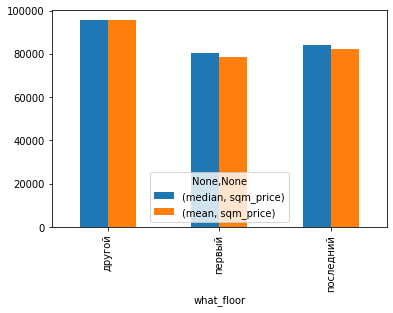

In [64]:
floor_table.plot(kind='bar')

Средня и медианная цена квадратного метра жилья на первом и последнем этажах значительно ниже остальных предложений из чего можно сделать вывод, что **факт нахождения кватиры на первом или последнем этаже влияет на цену**.

In [65]:
day_table = pd.pivot_table(data=df,index='dayofweek',aggfunc=['median','mean'])[[('median',       'sqm_price'),('mean',       'sqm_price')]]
day_table

,median,mean
,sqm_price,sqm_price
dayofweek,,
0,92592.59,91528.70
1,93181.82,91977.51
2,93234.10,92092.51
3,92187.50,91003.40
4,92112.68,91751.18
5,91216.22,90223.93
6,91908.00,90783.37


<AxesSubplot:xlabel='dayofweek'>

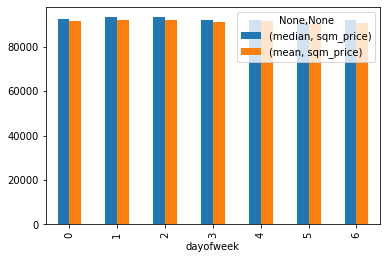

In [66]:
day_table.plot(kind='bar')

Существенной разницы в цене недвижимости в зависимости от дня публикации объявления нет.

In [67]:
month_table = pd.pivot_table(data=df,index='month',aggfunc=['median','mean'])[[('median',       'sqm_price'),('mean',       'sqm_price')]]
month_table

,median,mean
,sqm_price,sqm_price
month,,
1,92516.90,91236.95
2,92546.30,90684.77
3,93103.45,92250.09
4,94230.77,93335.92
5,90909.09,91820.69
6,89894.56,88748.65
7,93174.60,92012.27
8,94125.15,92590.88


<AxesSubplot:xlabel='month'>

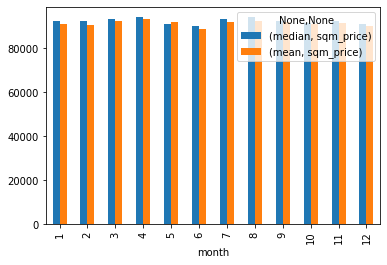

In [68]:
month_table.plot(kind='bar')

Существенной разницы в цене недвижимости в зависимости от месяца публикации объявления также нет (разве что незначительно выделяется июнь чуть сниженной ценой).

In [69]:
year_table = pd.pivot_table(data=df,index='year',aggfunc=['median','mean'])[[('median',       'sqm_price'),('mean',       'sqm_price')]]
year_table

,median,mean
,sqm_price,sqm_price
year,,
2014,106344.09,111078.29
2015,89043.45,88176.30
2016,89130.43,88775.71
2017,89673.91,89521.45
2018,93387.28,91566.80
2019,100912.23,98538.69


<AxesSubplot:xlabel='year'>

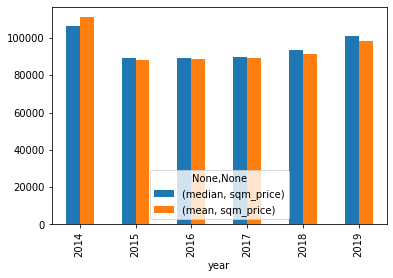

In [70]:
year_table.plot(kind='bar')

**Год публикации объявления имеет значение**. Цены постепенно растут с 2015 года. Данных по 2014-му году мало, поэтому их можно не принимать во внимание, как и резкое падение цены на графике в 2015 году. 

### Анализируем населенные пункты с максимальным числом объявлений

In [71]:
top_ten=pd.pivot_table(data=df,index='locality_name',aggfunc=['count','mean'])[[('count',       'sqm_price'),('mean',       'sqm_price')]].sort_values(('count',       'sqm_price'),ascending = False).head(10)
top_ten.sort_values(('mean',       'sqm_price'),ascending = False)



,count,mean
,sqm_price,sqm_price
locality_name,,
санкт-петербург,11969,105067.08
пушкин,300,100076.38
деревня кудрово,261,92661.34
поселок парголово,297,89831.38
поселок мурино,508,85907.81
поселок шушары,399,78825.18
колпино,311,75144.71
гатчина,267,68968.06


*Самое дорогое жилье в 10 населенных пунктах с наибольшим числом объявлений - в Санкт-Петербурге и Пушкине* (105 и 100 тыс. руб. за кв. м соответственно). *Самое дешевое - во Всеволожске и Выборге* (67 и 58 тыс. руб. за кв. м соответственно).

### Анализируем данные по центру города 

In [72]:
#выделяем данные по Санкт-Петербургу
sp_df = df.query('locality_name == "санкт-петербург"')

<AxesSubplot:xlabel='round_citycenters'>

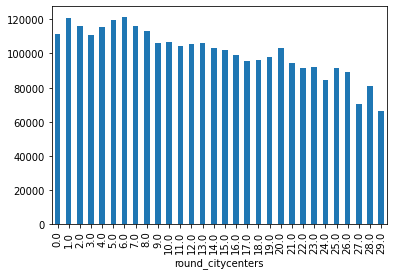

In [73]:
#Строим график средней цены квадратного метра на каждом километре удаленности от центра
sp_df['round_citycenters']=round(sp_df['cityCenters_nearest'] / 1000)
price_per_km =pd.pivot_table(data=sp_df, index = 'round_citycenters', aggfunc='mean')['sqm_price']
price_per_km.plot(kind='bar')


На графике видно, что снижение цены жилья начинается с шестого километра от центра города, так что вону центра можно включить пятикилометровую зону.

In [74]:
#Выделим центральную зону в датафрейме и выведем медианы
center_sp_df = sp_df.query('round_citycenters < 6')
center_median = center_sp_df.median()
all_median = df.median()
total = pd.concat([center_median, all_median],axis=1)
total.rename(columns = {0:'центр', 1:'вся выборка'}, inplace = True)
total


,центр,вся выборка
total_images,9.00,9.00
last_price,7200000.00,4340000.00
total_area,64.00,48.00
rooms,2.00,2.00
ceiling_height,2.80,2.65
floors_total,5.00,9.00
living_area,37.00,28.80
floor,3.00,4.00
is_apartment,0.00,0.00
studio,0.00,0.00


<AxesSubplot:>

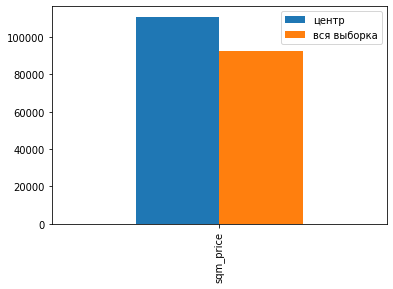

In [75]:
#В центре знаительно выше медианная цена квадратного метра
total.loc[['sqm_price']].plot(kind='bar')

<AxesSubplot:>

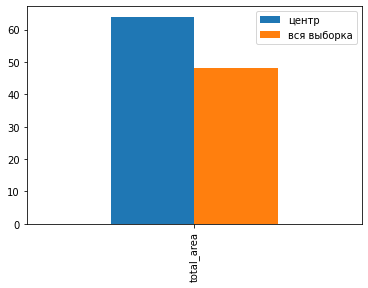

In [76]:
# Также в центре значительно больше квартиры.
total.loc[['total_area']].plot(kind='bar')

<AxesSubplot:>

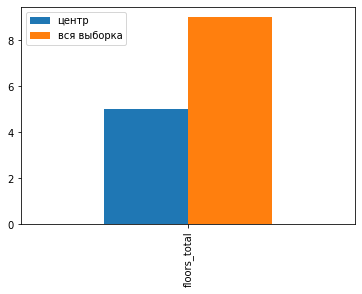

In [77]:
#В центре ощутимо ниже жилые дома
total.loc[['floors_total']].plot(kind='bar')

<AxesSubplot:>

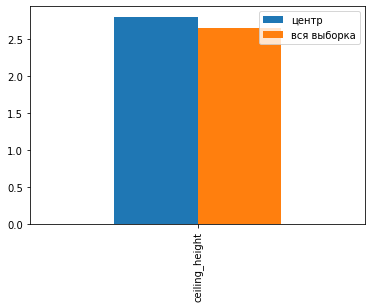

In [78]:
#Но по медиане на 15 см больше высота потолков.
total.loc[['ceiling_height']].plot(kind='bar')


<AxesSubplot:>

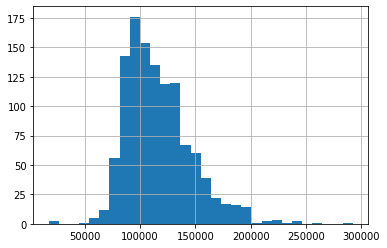

In [79]:
center_sp_df['sqm_price'].hist(bins=30)

<AxesSubplot:>

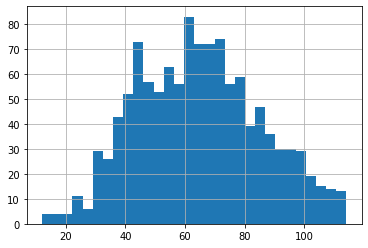

In [80]:
center_sp_df['total_area'].hist(bins=30)

<AxesSubplot:>

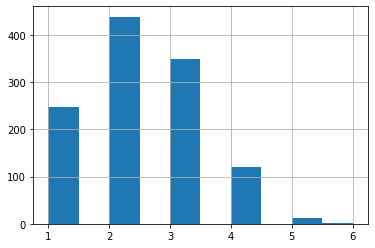

In [81]:
center_sp_df['rooms'].hist(bins=10)

<AxesSubplot:>

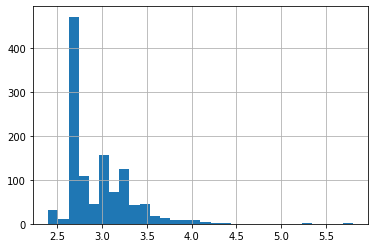

In [82]:
center_sp_df['ceiling_height'].hist(bins=30)

In [83]:
center_corr = center_sp_df.corr()['sqm_price']

center_corr

total_images              0.10
last_price                0.13
total_area               -0.59
rooms                    -0.55
ceiling_height           -0.07
floors_total              0.32
living_area              -0.57
floor                     0.24
is_apartment             -0.03
studio                    0.06
open_plan                -0.01
kitchen_area             -0.10
balcony                   0.25
airports_nearest          0.10
cityCenters_nearest       0.04
parks_around3000         -0.02
parks_nearest             0.07
ponds_around3000         -0.05
ponds_nearest             0.12
days_exposition          -0.07
sqm_price                 1.00
dayofweek                 0.06
month                    -0.03
year                      0.15
living_to_total_ratio    -0.26
kitchen_to_total_ratio    0.29
round_citycenters         0.05
Name: sqm_price, dtype: float64

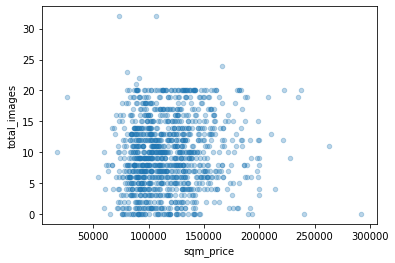

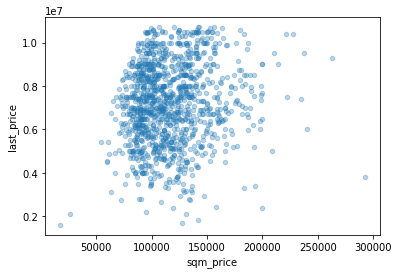

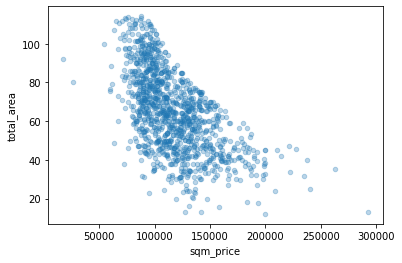

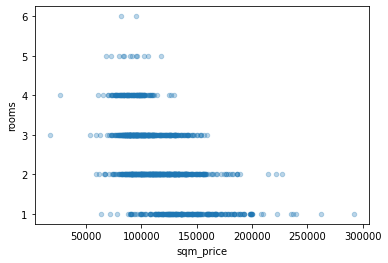

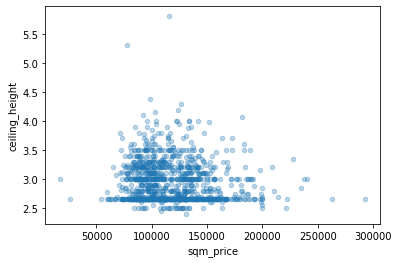

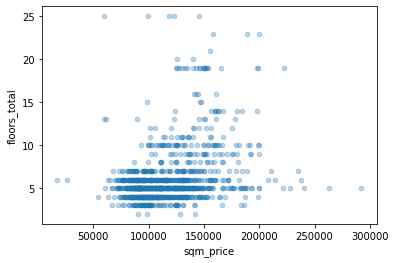

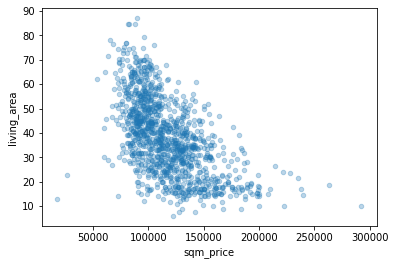

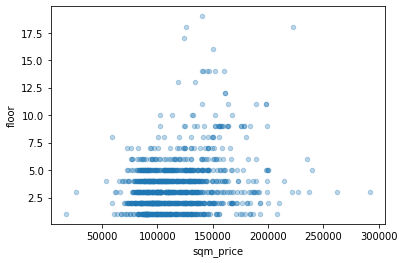

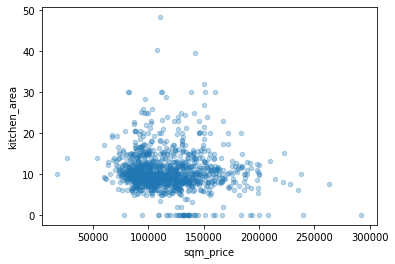

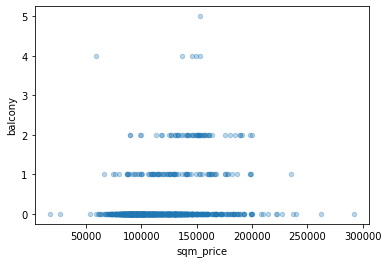

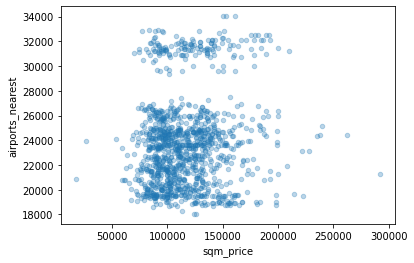

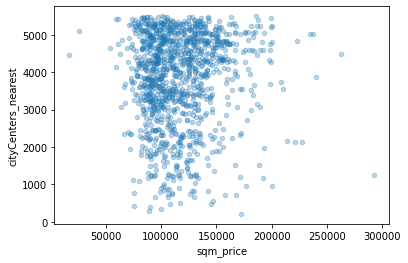

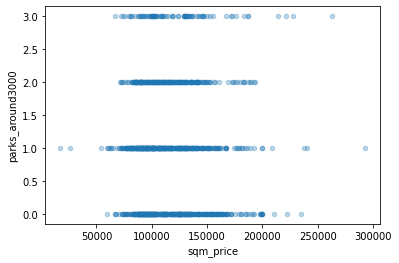

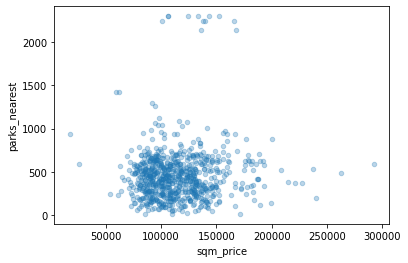

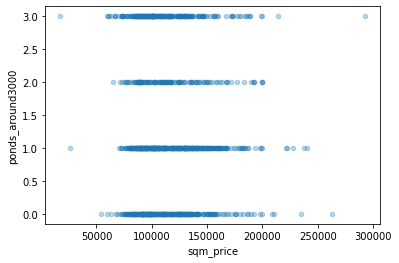

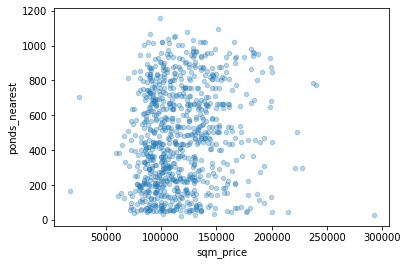

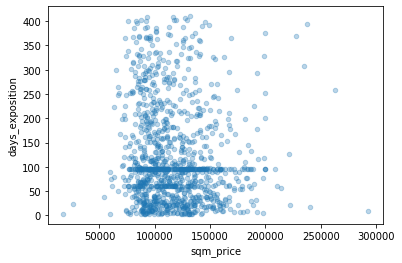

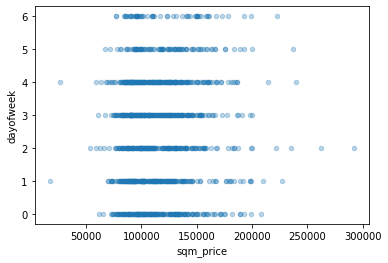

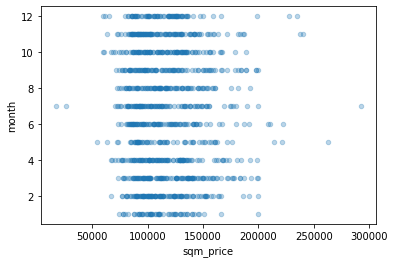

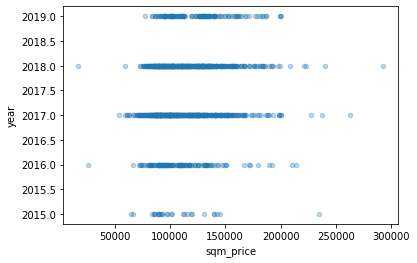

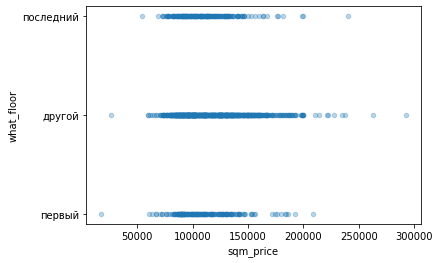

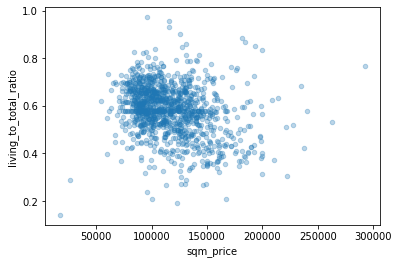

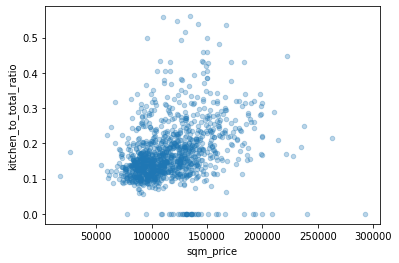

In [84]:
columns_for_plot = ['total_images', 'last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'dayofweek', 'month',
       'year', 'what_floor', 'living_to_total_ratio',
       'kitchen_to_total_ratio']
for i in columns_for_plot:
    center_sp_df.plot(x='sqm_price', y=i, kind='scatter', alpha=0.3)

In [85]:
#сопоставляем корреляции по центру и все выборке
all_corr = pd.concat([center_corr, total_corr],axis=1)
all_corr.columns = ['центр','вся выборка']
all_corr.sort_values(by='центр')

,центр,вся выборка
total_area,-0.59,-0.12
living_area,-0.57,-0.19
rooms,-0.55,-0.25
living_to_total_ratio,-0.26,-0.23
kitchen_area,-0.10,0.13
ceiling_height,-0.07,0.18
days_exposition,-0.07,-0.04
ponds_around3000,-0.05,0.07
is_apartment,-0.03,0.01
month,-0.03,-0.01


<AxesSubplot:xlabel='year'>

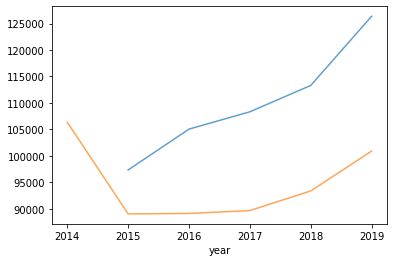

In [86]:
#В центре фиксируется более сильная динамка роста цен, чем по все выборке.
year_table_center = pd.pivot_table(data=center_sp_df,index='year',aggfunc=['median','mean'])[[('median',       'sqm_price'),('mean',       'sqm_price')]]
year_table_center

year_table_center[('median',       'sqm_price')].plot(alpha = 0.7)
year_table[('median',       'sqm_price')].plot(alpha = 0.7)

**В центральной части Санкт-Петербурга площадь квартиры сильно влияет на стоимость квадратного метра жилья**. Чем меньше квартира, тем выше цена "квардрата" (корреляция -0.59). Данная корреляция намного сильнее, чем по всей выборке. Также на стоимость жилья в центре влияет число комнат: чем меньше комнат, тем дороже метр жилья. Эти зависимости можно проследить на построенных выше диаграммах рассеивания. Высота потолков в центре почти не имеет влияния на цену, как и наличие водоемов и парков. Заметная положительная корреляция зафиксирована у цены "квардрата" с высотой здания (0.32, в целом по выборке - 0.32), относительным размером кухни (0.29, в целом по выборке - 0.21).В центре на цену влияет также наличие балкона (в целом по выборке такой корреляции почти нет). В центре удаленность от центра города большого значения не имеет, в отличии от данных по всей выборке. В центре фиксируется более сильная динамка роста цен, чем по все выборке в 2015-2019 годах.

## Общий вывод

1. Данные имеют **большой объем пропусков по показатялям близости к паркам и водоемам**, которые, вероятно, корректно не подгрузились к объявлениям. Стоит обратить внимание на устранение этих недостатков. 

2. **Среднее время проджи квартиры составляет 108 дней**, медианное - 94 дня. Нормальным можно считать срок экспозиции квартиры в диапаоне от 44 до 142 дней. 

3. Выявлена корреляция между стоимостью квадратного метра и расстоянием от центра (-0.39), высотой здания (0.35), числом комнат (-0.25, то есть, чем меньше комнат, тем выше цена квадратного метра), а также соотношением размера кухни с общей площадью (0.21, то есть увеличение относительного размера кухни приводит к росту стоимости жилья). 

4. **Средняя и медианная цена квадратного метра жилья на первом и последнем этажах значительно ниже остальных предложений**, из чего можно сделать вывод, что факт нахождения кватиры на первом или последнем этаже влияет на цену.

5. Существенной разницы в цене недвижимости в зависимости от дня и месяца публикации объявления нет.

6. **Год публикации объявления имеет значение**. Средние рублевые цены на недвижимость постепенно растут с 2015 по 2019 годы. За этот период в целом по выборке они выросли на 13,3%.

7. **Самое дорогое жилье** в 10 населенных пунктах с наибольшим числом объявлений - **в Санкт-Петербурге и Пушкине** (105 и 100 тыс. руб. за кв. м соответственно). **Самое дешевое - во Всеволожске и Выборге** (67 и 58 тыс. руб. за кв. м соответственно).

8. В центре Санкт-Петербурга значительно выше медианная цена квадратного метра. Также в центре значительно больше квартиры, ощутимо ниже жилые дома (9 этажей в среднем по выборке, 5 этажей - в центре) и на 15 см выше потолки.

9. **В центральной части Санкт-Петербурга площадь квартиры сильно влияет на стоимость квадратного метра жилья**. Чем меньше квартра, тем выше цена "квардрата" (корреляция -0.59). Данная корреляция намного сильнее, чем по всей выборке. Также на стоимость жилья в центре влияет число комнат: чем меньше комнат, тем дороже метр жилья. Высота потолков в центре почти не имеет влияния на цену, как и наличие водоемов и парков. Заметная положительная корреляция зафиксирована у цены "квардрата" с высотой здания (0.32, в целом по выборке - 0.32), относительным размером кухни (0.29, в целом по выборке - 0.21).В центре на цену влияет также наличие балкона (в целом по выборке такой корреляции почти нет). В центре удаленность от центра города большого значения не имеет, в отличии от данных по всей выборке. В центре фиксируется более сильная динамка роста цен, чем по все выборке в 2015-2019 годах.